<a href="https://colab.research.google.com/github/muhammadghazyy/mask_detector/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import MobileNetV2

from google.colab import files

In [4]:
print('GPU available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU available


##Kaggle Errands
https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset

In [5]:
#upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadghazy","key":"95167f954e059f51836df3fffe7c492a"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 95% 314M/330M [00:09<00:00, 20.6MB/s]
100% 330M/330M [00:09<00:00, 36.3MB/s]


In [ ]:
!unzip face-mask-12k-images-dataset.zip

##Initial Parameters

In [38]:
input_shape = (120,120,3)
batch_size = 32
epochs = 30
learn_rate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=learn_rate, epsilon=False , amsgrad=False)

## Initiating Training and Validation Sets


In [28]:
train_dir = '/content/Face Mask Dataset/Train'
test_dir = '/content/Face Mask Dataset/Test'
val_dir = '/content/Face Mask Dataset/Validation'

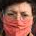

In [33]:
tf.keras.preprocessing.image.load_img(test_dir+'/WithMask/1163.png')

In [36]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.15,
    zoom_range = 0.2,
    brightness_range = [0.4,1.4],
    horizontal_flip= True,
    vertical_flip = True,
    fill_mode='nearest'
)

datagen_val , datagen_test = ImageDataGenerator(),ImageDataGenerator()

In [39]:
train_generator = datagen.flow_from_directory(
    directory = train_dir,
    class_mode = 'sparse',
    target_size=(120,120),
    batch_size = 32,
    shuffle = True,
    interpolation = 'nearest'
)

Found 10000 images belonging to 2 classes.


In [40]:
val_generator = datagen_val.flow_from_directory(
    directory = val_dir,
    class_mode = 'sparse',
    target_size = (120,120),
    batch_size = 32,
    shuffle = True,
    interpolation = 'nearest'
)

Found 800 images belonging to 2 classes.


In [41]:
test_generator = datagen_test.flow_from_directory(
    directory = test_dir,
    class_mode = 'sparse',
    target_size = (120,120),
    batch_size = 32,
    shuffle = True,
    interpolation = 'nearest'
)

Found 992 images belonging to 2 classes.


In [43]:
labels = train_generator.class_indices
labels = dict((i,j) for i,j in labels.items())
n_classes = len(labels)
print(labels)
print(n_classes)

{'WithMask': 0, 'WithoutMask': 1}
2


##Model Building using EfficientNetB7

In [44]:
enb7 = EfficientNetB7(input_shape=input_shape , include_top=False, weights='imagenet')

258080768/258076736 [==============================] - 6s 0us/step


In [45]:
model = tf.keras.Sequential([
                             enb7,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(256,activation=tf.nn.relu),
                             tf.keras.layers.Dense(n_classes,activation=tf.nn.softmax)
])

In [46]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=adam,metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 4, 4, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               655616    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 64,753,817
Trainable params: 64,443,090
Non-trainable params: 310,727
_________________________________________________________________


In [47]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

In [51]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 2,
    steps_per_epoch = step_size_train,
    validation_steps = step_size_val
)

Epoch 1/2
312/312 [==============================] - 353s 1s/step - loss: 0.0306 - acc: 0.9928 - val_loss: 0.0066 - val_acc: 0.9975
Epoch 2/2
312/312 [==============================] - 353s 1s/step - loss: 0.0599 - acc: 0.9848 - val_loss: 0.0074 - val_acc: 0.9987


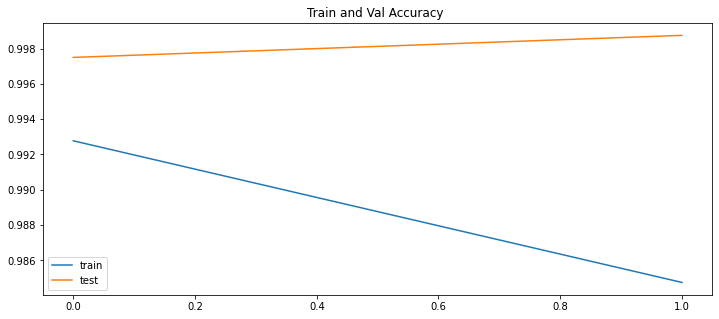

In [54]:
 plt.figure(figsize=(12,5))
plt.title('Train and Val Accuracy ')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

##Model Building using MobileNetV2

In [58]:
mnv2 = MobileNetV2(input_shape=(120,120,3),include_top=False,weights='imagenet')

In [59]:
model2 = tf.keras.Sequential([
                             mnv2,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(256,activation=tf.nn.relu),
                             tf.keras.layers.Dense(n_classes,activation=tf.nn.softmax)
])

In [60]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer=adam,metrics=['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 2,586,434
Trainable params: 2,552,322
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

In [61]:
history2 = model2.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 2,
    steps_per_epoch = step_size_train,
    validation_steps = step_size_val
)

Epoch 1/2
312/312 [==============================] - 76s 224ms/step - loss: 0.1699 - acc: 0.9428 - val_loss: 4.4891 - val_acc: 0.6413
Epoch 2/2
312/312 [==============================] - 69s 222ms/step - loss: 0.0500 - acc: 0.9846 - val_loss: 1.6342 - val_acc: 0.9175


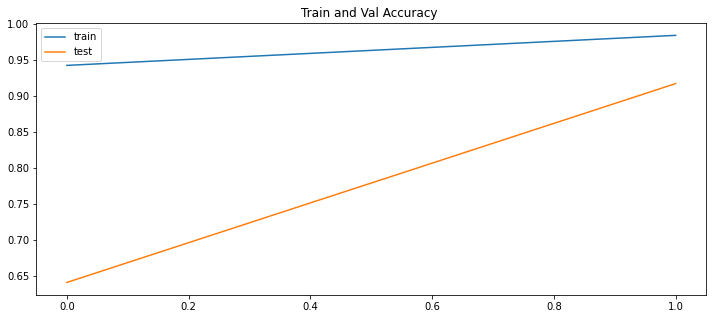

In [63]:
plt.figure(figsize=(12,5))
plt.title('Train and Val Accuracy ')
plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.legend()
plt.show()

## Saving model into HDF5 File Format

In [55]:
model.save('mask_enb7.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [65]:
model2.save('mask_mnv2.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


The model file is way too big. The model with mobilenet is around 500MB and the efficientnet one is around 700MB. The file size is too big to be uploaded to GitHub.